# 2 . Bi-variate   Analysis

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests 
from bs4 import BeautifulSoup

import re

In [4]:
df4=pd.read_csv(r"C:Water_purifier2.csv")
df4

,Unnamed: 0,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,0,Blue Star,7499,11400,4.1,34.0,Free delivery,Electrical & Storage,8
1,2,Aqua Fresh,4751,16500,4.1,71.0,Free delivery,Electrical & Storage,12
2,3,Aquaguard Glory,11999,22000,4.2,45.0,Free delivery,Electrical & Storage,5
3,4,LIVPURE LIV-PEP-PRO-PLUS+,7999,15500,4.3,48.0,Free delivery,Electrical & Storage,12
4,5,KENT Ace,11999,19500,4.4,38.0,Free delivery,Electrical & Storage,5
...,...,...,...,...,...,...,...,...,...
692,977,AQUA water,5489,12999,4.3,57.0,Free delivery,Electrical & Storage,18
693,978,g.s. aquafresh,4566,12000,4.3,61.0,Free delivery,Electrical & Storage,5
694,980,AquaDart Mineral,4799,19999,3.6,76.0,Free delivery,Electrical & Storage,12
695,981,Aquafresh AURA,4445,13999,3.0,68.0,Free delivery,Electrical & Storage,12


In [43]:
df4.drop(columns='Unnamed: 0',inplace=True)

## Exploratory Data Analysis

In [44]:
df4

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,Blue Star,7499,11400,4.1,34.0,Free delivery,Electrical & Storage,8
1,Aqua Fresh,4751,16500,4.1,71.0,Free delivery,Electrical & Storage,12
2,Aquaguard Glory,11999,22000,4.2,45.0,Free delivery,Electrical & Storage,5
3,LIVPURE LIV-PEP-PRO-PLUS+,7999,15500,4.3,48.0,Free delivery,Electrical & Storage,12
4,KENT Ace,11999,19500,4.4,38.0,Free delivery,Electrical & Storage,5
...,...,...,...,...,...,...,...,...
692,AQUA water,5489,12999,4.3,57.0,Free delivery,Electrical & Storage,18
693,g.s. aquafresh,4566,12000,4.3,61.0,Free delivery,Electrical & Storage,5
694,AquaDart Mineral,4799,19999,3.6,76.0,Free delivery,Electrical & Storage,12
695,Aquafresh AURA,4445,13999,3.0,68.0,Free delivery,Electrical & Storage,12


In [48]:
df=df4.corr()
df

,Price(₹),Original_cost(₹),Rating,Discount(%),Capacity (L/hr)
Price(₹),1.000000,0.924027,0.091501,-0.412968,-0.019833
Original_cost(₹),0.924027,1.000000,0.058087,-0.105052,0.017719
Rating,0.091501,0.058087,1.000000,-0.140254,0.027171
Discount(%),-0.412968,-0.105052,-0.140254,1.000000,0.075188
Capacity (L/hr),-0.019833,0.017719,0.027171,0.075188,1.000000


In [49]:
df4[df4['Price(₹)']>80000]

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
452,BeethoSOL K-07,170890,179990,4.3,5.0,Free delivery,Electrical & Storage,5
485,BeethoSOL SM-2F9,227890,239990,4.3,5.0,Free delivery,Electrical & Storage,5


In [50]:
#df4=df4.drop([0,1,2],axis=0)

# Scatter plot

### Numerical vs Numerical

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price(₹)', ylabel='Discount(%)'>

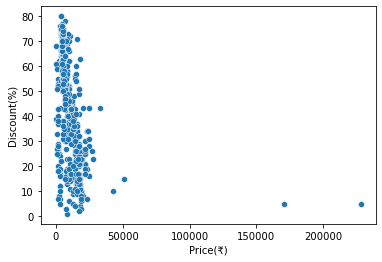

In [53]:
#plt.figure(figsize=[60,60])
sns.scatterplot(df4["Price(₹)"],df4["Discount(%)"])

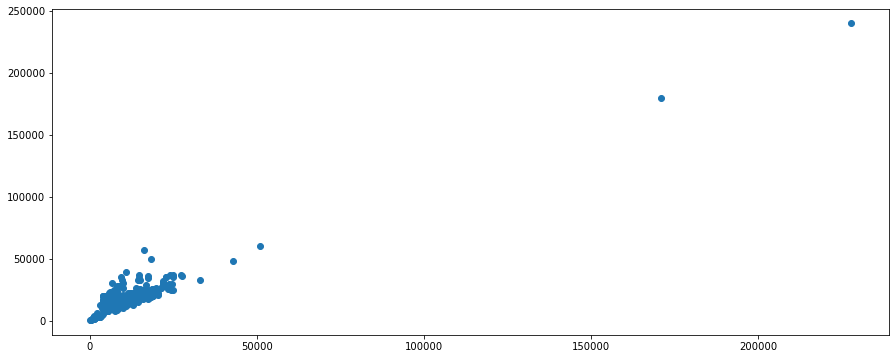

In [58]:
plt.figure(figsize=(15,6))
plt.scatter(df4["Price(₹)"],df4["Original_cost(₹)"])

# Observations
- Price between 0-30,000Rs/- having more items
- Original price between 0-40,000Rs/- having more items

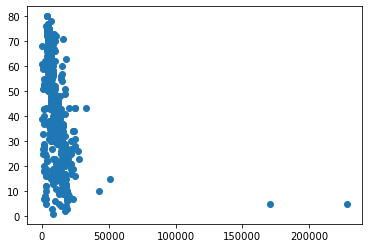

In [18]:
plt.scatter(df4["Price(₹)"],df4["Discount(%)"])

# Observations 
- Price between 0-25,000Rs/- under discount between 0-80% having more items

# pair plot

### Numerical vs Numerical

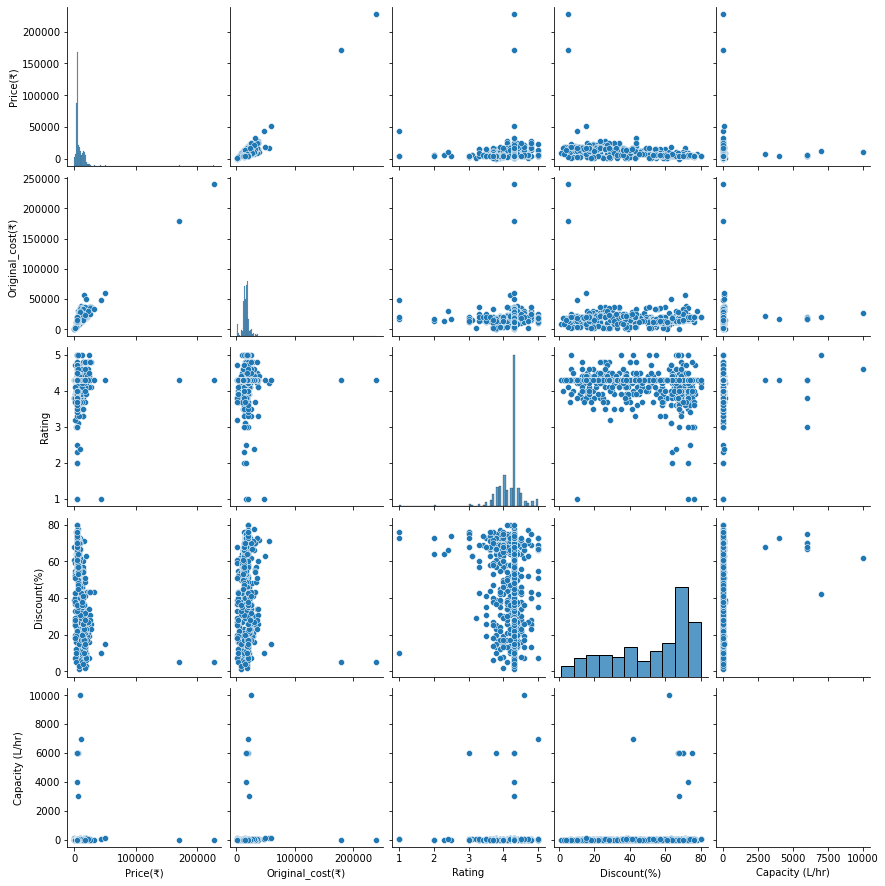

In [19]:
sns.pairplot(df4)

## line plot
### Categorical vs Numerical

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

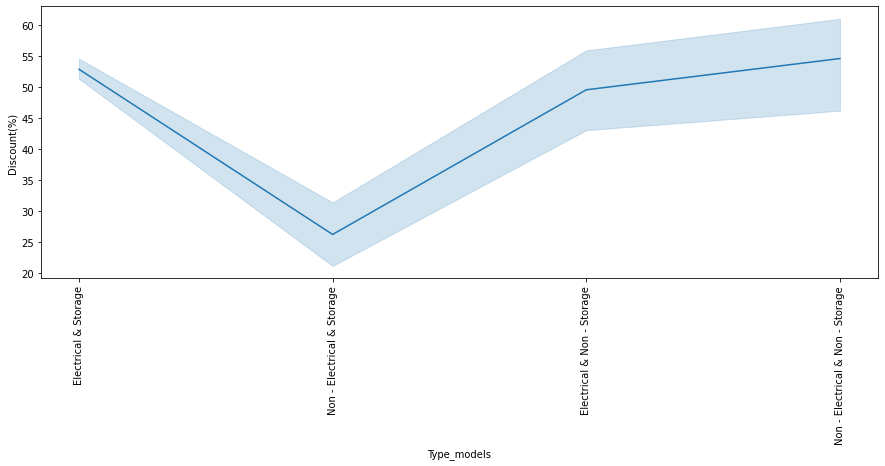

In [5]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df4, x="Type_models", y="Discount(%)")
plt.xticks(rotation = 90)

# Observations
- Non-Electrical & Non-Storage purifiers having discount between 45-60%
- Electrical & Storage purifiers having discount between 52-54%

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

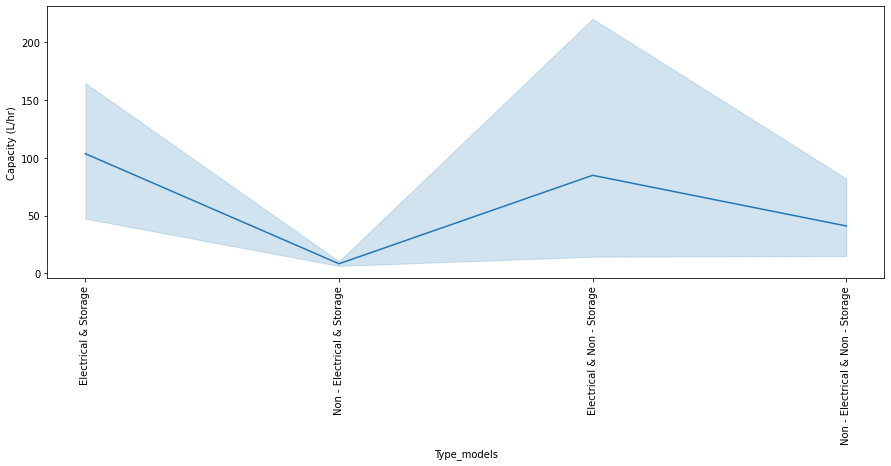

In [60]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df4, x="Type_models", y="Capacity (L/hr)")
plt.xticks(rotation = 90)

# Observations 
- Electrical & Non-Storage purifiers having capacity more then 200(L/hr)
- Non-Electrical & Storage purifiers having less capacity upto 10(L/hr)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

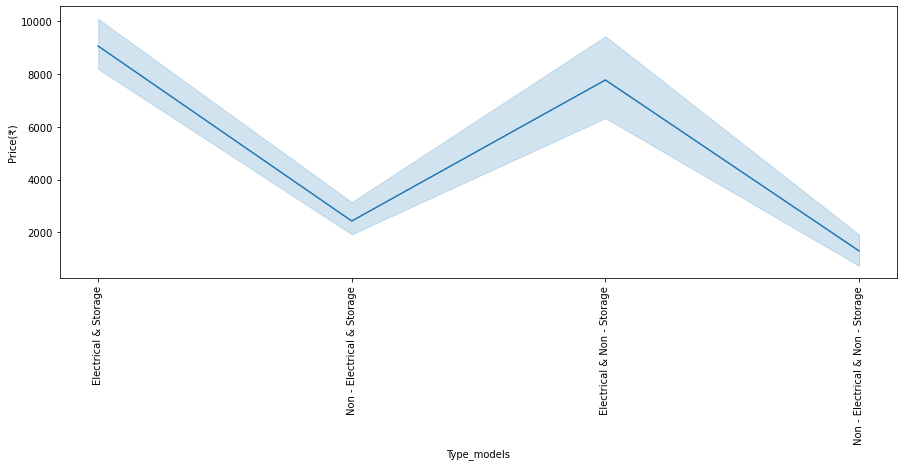

In [61]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df4, x="Type_models", y="Price(₹)")
plt.xticks(rotation = 90)

### Numerical vs Numerical

In [45]:
z=df4[df4['Price(₹)']<3000000 ]

<AxesSubplot:xlabel='Rating', ylabel='Price(₹)'>

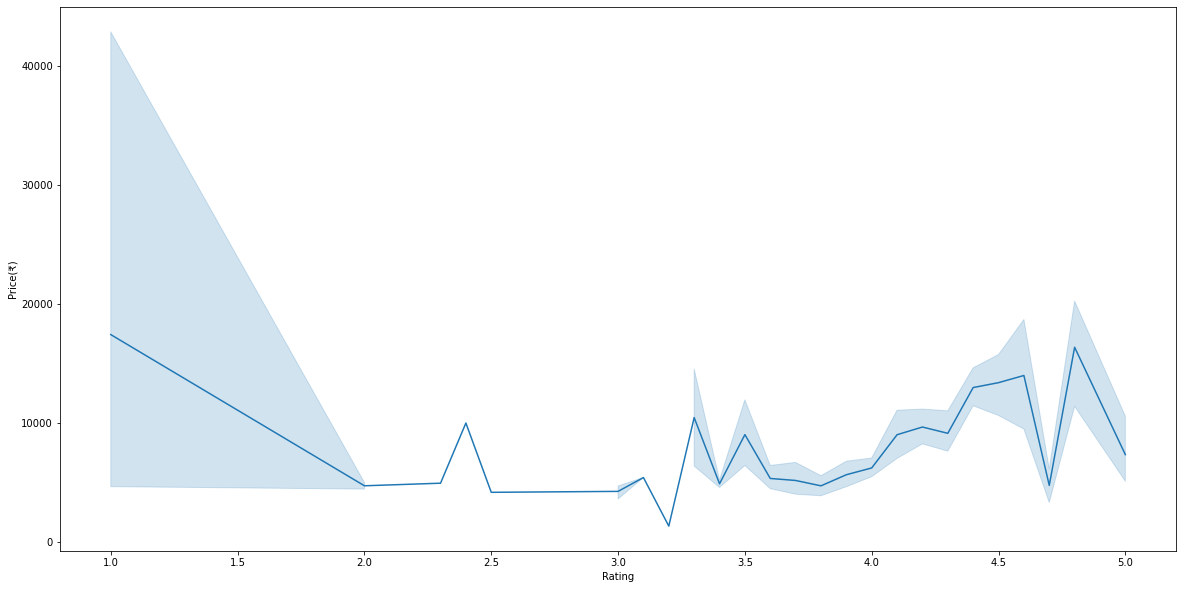

In [46]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Rating',y='Price(₹)',data=pd.DataFrame(z))
# Most preferred rating is 4.5 with price 12500 to 15000

## Boxplot

### Numerical vs Numerical

In [23]:
df4.head()

,ProductName,Price(₹),Original_cost(₹),Rating,Discount(%),Delivery_offers,Type_models,Capacity (L/hr)
0,Blue Star,7499,11400,4.1,34.0,Free delivery,Electrical & Storage,8
1,Aqua Fresh,4751,16500,4.1,71.0,Free delivery,Electrical & Storage,12
2,Aquaguard Glory,11999,22000,4.2,45.0,Free delivery,Electrical & Storage,5
3,LIVPURE LIV-PEP-PRO-PLUS+,7999,15500,4.3,48.0,Free delivery,Electrical & Storage,12
4,KENT Ace,11999,19500,4.4,38.0,Free delivery,Electrical & Storage,5


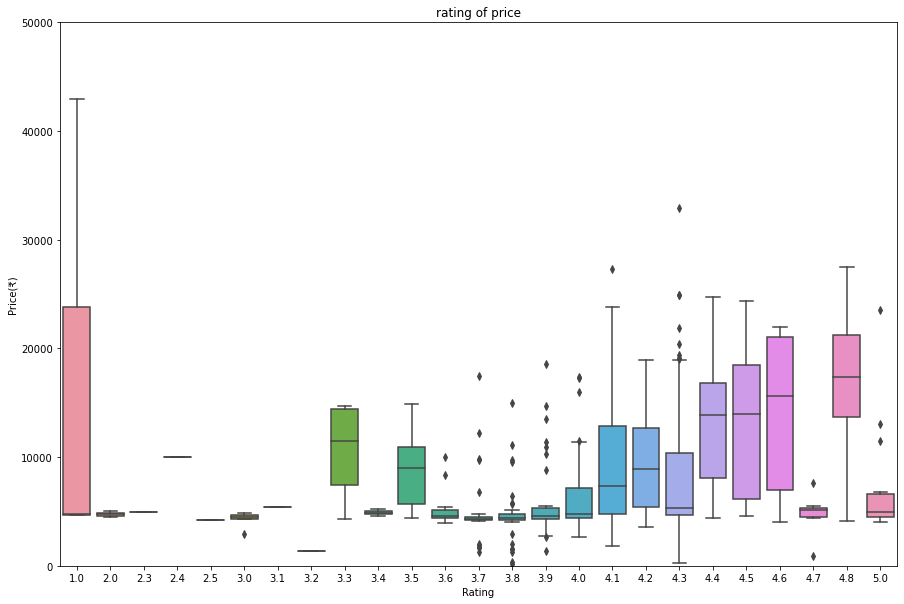

In [64]:
plt.figure(figsize=[15,10])
sns.boxplot(x="Rating", y="Price(₹)", data=df4)
plt.title('rating of price')
plt.ylim(0,50000)
#plt.xticks(rotation = 90)
plt.show()

# observation
+ The least rating at 1.0 have more ratings in the price between 5000-25000/-Rs

(0.0, 30000.0)

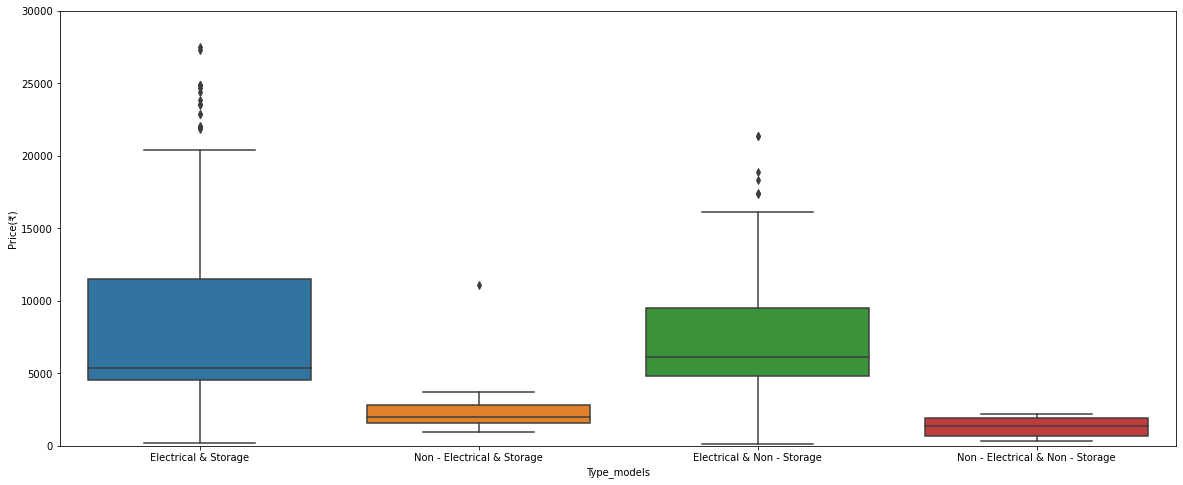

In [68]:
plt.figure(figsize=[20,8])
sns.boxplot(x="Type_models", y="Price(₹)", data=df4)
plt.ylim(0,30000)

# Observations
- Electrical & stroarge purifiers and Electrical & Non-storage purifiers having more price range between 5,000-12,000/-Rs and 5,000-10,000/-Rs.
- Non-Electrical & storage purifiers and Non-electrical & Non-Storage purifiers have lowest prices from 2,000-4,000 and 1,000-2,000/-Rs.

# Heat Map

### Numerical vs Numerical

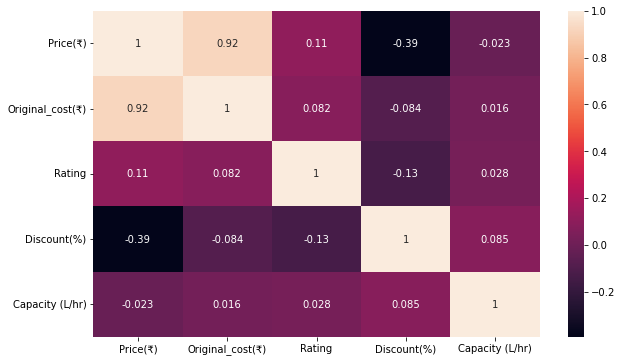

In [36]:
plt.figure(figsize=(10,6)) # very useful plot to check correlations between any two numerical variables
sns.heatmap(df4.corr(),annot=True)
plt.show()

In [70]:
df=df4.corr()
df

,Price(₹),Original_cost(₹),Rating,Discount(%),Capacity (L/hr)
Price(₹),1.000000,0.924027,0.091501,-0.412968,-0.019833
Original_cost(₹),0.924027,1.000000,0.058087,-0.105052,0.017719
Rating,0.091501,0.058087,1.000000,-0.140254,0.027171
Discount(%),-0.412968,-0.105052,-0.140254,1.000000,0.075188
Capacity (L/hr),-0.019833,0.017719,0.027171,0.075188,1.000000


## Bar Graph  -
### Numerical vs Categorical

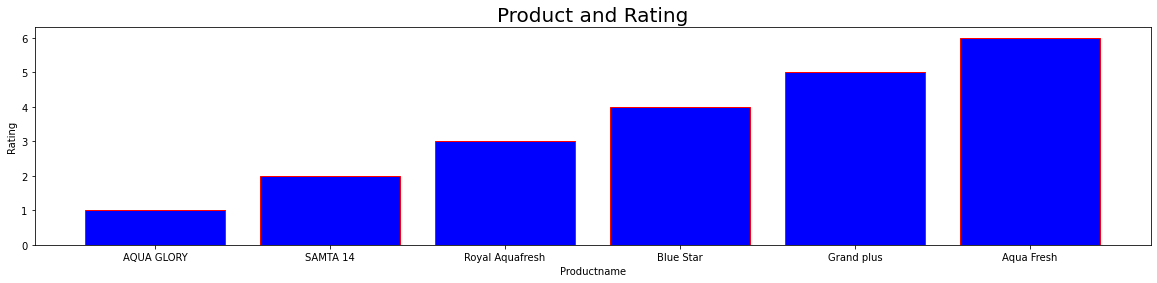

In [74]:
plt.figure(figsize=(20,4))
product_name=["AQUA GLORY","SAMTA 14","Royal Aquafresh","Blue Star","Grand plus","Aqua Fresh"]
Rating_in_k=[1,2,3,4,5,6]
plt.bar(product_name,Rating_in_k,color='blue',edgecolor='red') # bar is vertical, barh gives horizontal bar
plt.title("Product and Rating",fontsize=20)
plt.xlabel('Productname')
plt.ylabel('Rating')
plt.show()

# Observations
- Aqua Fresh purifier having highest rating upto 6.
- Aqua Glory purifier having lowest rating upto 1.

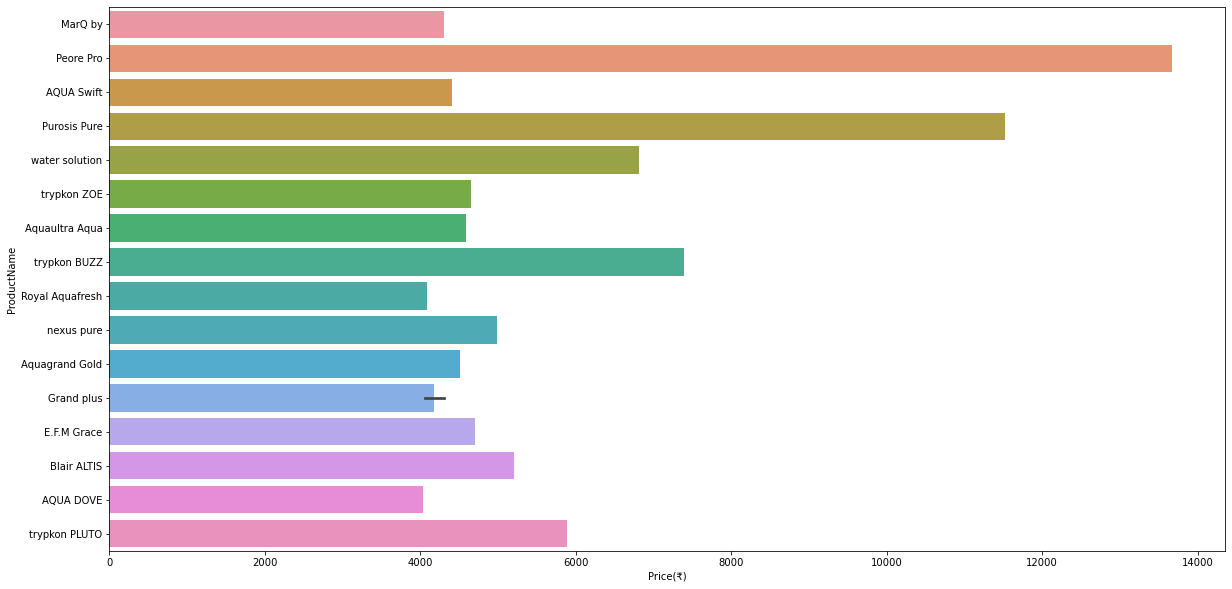

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(y='ProductName',x='Price(₹)',data=pd.DataFrame(c))
sns.set_context('paper',font_scale=3)

# Observations 
- Peore Pro having more price upto 13,800.Rs
- Royal Aquafresh and Aqua Dove having least price upto 4,000.Rs

# Violin plot

### Categorical vs numerical

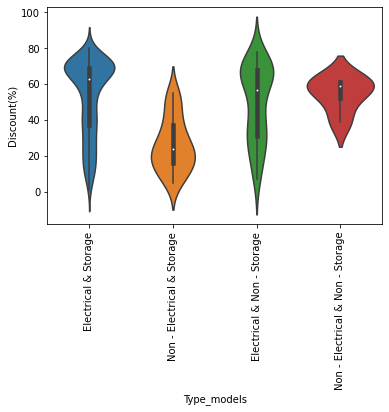

In [27]:
sns.violinplot(data=df4,x="Type_models",y="Discount(%)")
plt.xticks(rotation = 90)
plt.show()

# Observations
- Electrical & storage items have more discount between 60%-80% and Non-Electrical & Storage items have more discount at 5%-20%
- Electrical & Non-Stroage items have more discount between 60%-80% and Non-Electrical & Non-Storage items have discount at 60%-80% 